In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import ROOT
import pandas as pd
import numpy as np
from hist.get_data import get_data, get_data_in_np
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

Welcome to JupyROOT 6.26/04


In [2]:
# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe

from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon

iminuit version: 2.15.2


# D0 -> K+ K-

## Signal MC

In [11]:
file_name_ref_phi = '/media/jykim/ssd_T5/storage/ref_study/ntuples/D2kpkm_signal_own_1M.root'

In [12]:
base_filter2 = 'D0_M>1.665 && D0_M<2.065 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && ref_phi_rank_Dstp==1'

base_filter = 'D0_M>1.665 && D0_M<2.065'

In [13]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p',"Dstarp_isSignal"]

In [14]:
pd_ref_phi = get_data(file=file_name_ref_phi, tree='ref_phi', base_filter=base_filter,variables=signal_variables )
pd_ref_phi2 = get_data(file=file_name_ref_phi, tree='ref_phi', base_filter=base_filter2,variables=signal_variables )


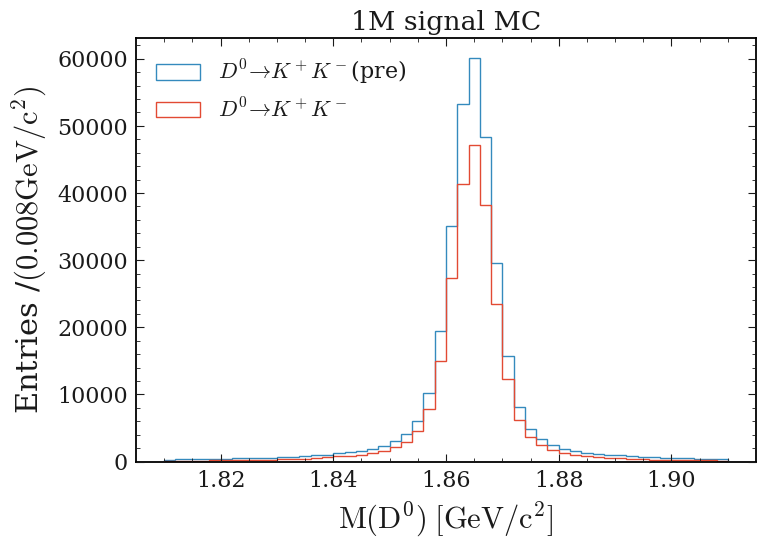

In [18]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xrange = (1.81,1.91,51)

xm = np.linspace(*xrange)


# df = pd_ref_omega.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009")

df = pd_ref_phi
df2 = pd_ref_phi2
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^+ K^-$(pre)');

plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^+ K^-$');


# plt.hist(df[df["Dstarp_isSignal"]!=1]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^+ K^-$(false)');


plt.legend(loc="upper left")
ax.set_title(r'1M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


## Generic MC

In [ ]:

signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p']

In [ ]:
ccbar_name_ref_phi = '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/D2antiKstarpi0_ccbar_recon_output_0*.root'

uubar_name_ref_phi = ccbar_name_ref_phi.replace("ccbar", "uubar")

ddbar_name_ref_phi = ccbar_name_ref_phi.replace("ccbar", "ddbar")

ssbar_name_ref_phi = ccbar_name_ref_phi.replace("ccbar", "ssbar")

charged_name_ref_phi = ccbar_name_ref_phi.replace("ccbar", "charged")

mixed_name_ref_phi = ccbar_name_ref_phi.replace("ccbar", "mixed")

# taupair_name_ref_phi = ccbar_name_Dtokshortpi0.replace("ccbar", "taupair")

In [ ]:
# base_filter = 'ref_phi_rank_Dstp==1'

base_filter = 'ref_phi_rank_Dstp==1 && abs(Dstarp_Q - 0.00593)>0.0006 && Dstarp_CMS_p>2.4'

In [ ]:
base_ccbar_1abinv_ref_phi = get_data(file=ccbar_name_ref_phi, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_uubar_1abinv_ref_phi = get_data(file=uubar_name_ref_phi, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_ddbar_1abinv_ref_phi = get_data(file=ddbar_name_ref_phi, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_ssbar_1abinv_ref_phi = get_data(file=ssbar_name_ref_phi, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_charged_1abinv_ref_phi = get_data(file=charged_name_ref_phi, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_mixed_1abinv_ref_phi = get_data(file=mixed_name_ref_phi, tree='kshort', base_filter=base_filter,variables=signal_variables )

base_taupair_1abinv_ref_phi = get_data(file=taupair_name_ref_phi, tree='kshort', base_filter=base_filter,variables=signal_variables )



In [ ]:
cut = ""

In [ ]:
ccbar_1abinv_ref_phi = base_ccbar_1abinv_ref_phi.query(cut)
uubar_1abinv_ref_phi = base_uubar_1abinv_ref_phi.query(cut)
ddbar_1abinv_ref_phi = base_ddbar_1abinv_ref_phi.query(cut)
ssbar_1abinv_ref_phi = base_ssbar_1abinv_ref_phi.query(cut)
charged_1abinv_ref_phi = base_charged_1abinv_ref_phi.query(cut)
mixed_1abinv_ref_phi = base_mixed_1abinv_ref_phi.query(cut)
taupair_1abinv_ref_phi = base_taupair_1abinv_ref_phi.query(cut)

In [ ]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ]


colors=b2helix(6)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar','ccbar']

    print(var)
    mixed_bkg = {var : mixed_1abinv_ref_phi[var] }
    charged_bkg = {var : charged_1abinv_ref_phi[var] }
    ccbar_bkg = {var : ccbar_1abinv_ref_phi[var] }
    uubar_bkg = {var : uubar_1abinv_ref_phi[var] }
    ddbar_bkg = {var : ddbar_1abinv_ref_phi[var] }
    ssbar_bkg = {var : ssbar_1abinv_ref_phi[var] }
#     taupair_bkg = {var : taupair_1abinv_Dtokshortpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    plt.hist(data_list[var], bins=50, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
        
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
#     cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

#     n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

    ax.set_xlim(1.665,2.065)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()
print(f"mixed = {len(mixed_bkg[var])}")
print(f"charged = {len(charged_bkg[var])}")
print(f"uubar = {len(uubar_bkg[var])}")
print(f"ddbar = {len(ddbar_bkg[var])}")
print(f"ccbar = {len(ccbar_bkg[var])}")
print(f"ssbar = {len(ssbar_bkg[var])}")
# print(f"taupair = {len(taupair_bkg[var])}")

print(f"TOTAL # = {len(mixed_bkg[var]) + len(charged_bkg[var]) + len(uubar_bkg[var]) + len(ddbar_bkg[var]) + len(ssbar_bkg[var]) + len(ccbar_bkg[var]) + len(taupair_bkg[var])}")


In [8]:
def one_gauss(x, s, mu, sigma):
    func =  s * norm.pdf(x, mu, sigma)
#     return func
    
    return s, func


In [13]:
def two_gauss(x, s1, mu, sigma1 , s2, sigma2):
    func =  s1 * norm.pdf(x, mu, sigma1) + s2 * norm.pdf(x, mu, sigma2)
#     return func
    
    return s1+s2, func

In [14]:
dataset = pd_ref_phi[(pd_ref_phi['D0_M']>1.82) & (pd_ref_phi['D0_M']<1.9)]['D0_M']

In [15]:
PDF = two_gauss
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=190000,s2=50000, mu=1.86, sigma1=0.05,sigma2=0.05)

In [17]:
m.limits["s1","s2"]=(0,None)

m.limits["sigma1","sigma2"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7.623e+06                 │              Nfcn = 222              │
│ EDM = 0.000352 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1     │  197.8e3  │   1.6e3   │            │            │    0    │         │       │
│ 1 │ mu     │ 1.864673  │ 0.000009  │            │            │   1.8   │   1.9   │       │
│ 2 │ sigma1 │ 3.678e-3  │ 0.018e-3  │            │            │    0    │   0.1   │       │
│ 3 │ s2     │  54.5e3   │   1.1e3   │            │            │    0    │         │       │
│ 4 │ sigma2 │ 14.87e-3  │  0.11e-3  │            │            │    0    │   0.1   │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────┐
│        │        s1        mu    sigma1        s2    sigma2 │
├────────┼───────────────────────────────────────────────────┤
│     s1 │  2.58e+06 -0.000236    0.0255 -1.69e+06     0.157 │
│     mu │ -0.000236  8.72e-11 -3.99e-12  0.000169 -7.28e-12 │
│ sigma1 │    0.0255 -3.99e-12  3.36e-10   -0.0184  1.71e-09 │
│     s2 │ -1.69e+06  0.000169   -0.0184  1.26e+06    -0.113 │
│ sigma2 │     0.157 -7.28e-12  1.71e-09    -0.113  1.27e-08 │
└────────┴───────────────────────────────────────────────────┘

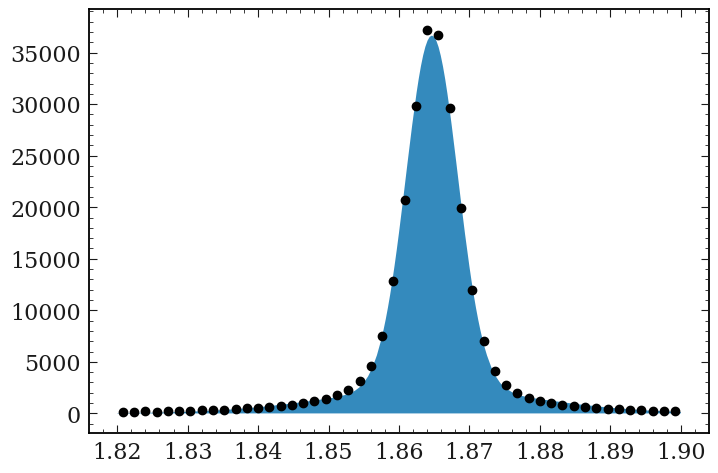

In [18]:
COST.visualize(m.values)

In [19]:
m.interactive()

true entries = 252208


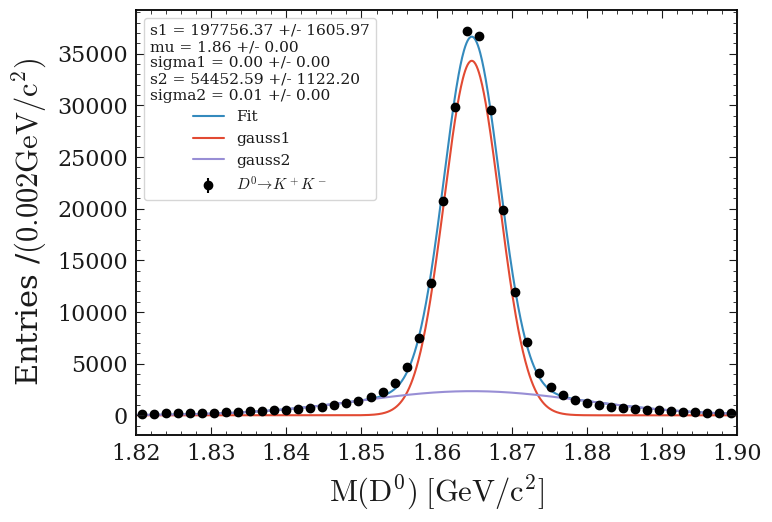

In [21]:
n, xe = np.histogram(dataset, bins=50, range=(1.82,1.9))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.82,1.9,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to K^+ K^-$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")


plt.plot(xm, two_gauss(xm, *m.values)[1] * dx[0] ,label="Fit")
plt.plot(xm, one_gauss(xm, *m.values[0:3])[1] * dx[0] ,label="gauss1")
plt.plot(xm, one_gauss(xm, m.values['s2'],m.values['mu'],m.values['sigma2'], )[1] * dx[0] ,label="gauss2")


#plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
#plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")
#plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.82,1.9)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# D0 -> pi+ pi-

## Signal MC

In [19]:
file_name_ref_rho = '/media/jykim/ssd_T5/storage/ref_study/ntuples/D2pippim_signal_own_1M.root'

In [20]:
# base_filter = 'D0_M>1.665 && D0_M<2.065 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && ref_antiKstar_rank_Dstp==1'
base_filter = 'D0_M>1.665 && D0_M<2.065 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.7 && ref_rho_rank_Dstp==1'
base_filter2 = 'D0_M>1.665 && D0_M<2.065'

In [21]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p',"Dstarp_isSignal"]

In [22]:
pd_ref_rho = get_data(file=file_name_ref_rho, tree='ref_rho', base_filter=base_filter,variables=signal_variables )
pd_ref_rho2 = get_data(file=file_name_ref_rho, tree='ref_rho', base_filter=base_filter2,variables=signal_variables )


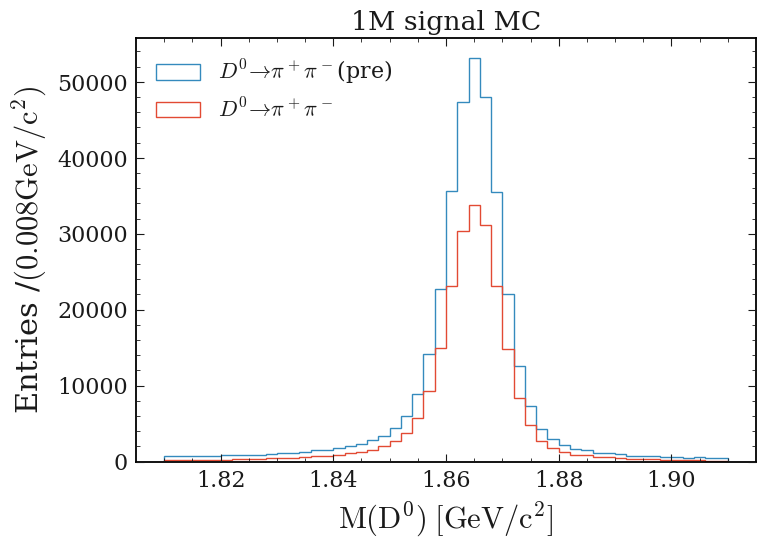

In [41]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,151)
xrange = (1.81,1.91,51)

xm = np.linspace(*xrange)


# df = pd_ref_omega.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009")

df = pd_ref_rho
df2 = pd_ref_rho2


plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \pi^+ \pi^-$(pre)');
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \pi^+ \pi^-$');

# plt.hist(df[df["Dstarp_isSignal"]!=1]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \pi^+ \pi^-$(false)');


plt.legend(loc="upper left")
ax.set_title(r'1M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


In [57]:
def one_gauss(x, s, mu, sigma):
    func =  s * norm.pdf(x, mu, sigma)
#     return func
    
    return s, func


In [27]:
def two_gauss(x, s1, mu, sigma1 , s2, sigma2):
    func =  s1 * norm.pdf(x, mu, sigma1) + s2 * norm.pdf(x, mu, sigma2)
#     return func
    
    return s1+s2, func

In [28]:
dataset = pd_ref_rho[(pd_ref_rho['D0_M']>1.82) & (pd_ref_rho['D0_M']<1.9)]['D0_M']

In [29]:
PDF = two_gauss
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=170000,s2=50000, mu=1.86, sigma1=0.05, sigma2=0.05)

In [32]:
m.limits["s1","s2"]=(0,None)

m.limits["sigma1","sigma2"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.765e+06                 │              Nfcn = 216              │
│ EDM = 3.81e-05 (Goal: 0.0002)    │            time = 0.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1     │  176.6e3  │   0.6e3   │            │            │    0    │         │       │
│ 1 │ mu     │ 1.864768  │ 0.000012  │            │            │   1.8   │   1.9   │       │
│ 2 │ sigma1 │ 4.592e-3  │ 0.014e-3  │            │            │    0    │   0.1   │       │
│ 3 │ s2     │  51.4e3   │   0.5e3   │            │            │    0    │         │       │
│ 4 │ sigma2 │ 15.99e-3  │  0.07e-3  │            │            │    0    │   0.1   │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────┐
│        │        s1        mu    sigma1        s2    sigma2 │
├────────┼───────────────────────────────────────────────────┤
│     s1 │  3.22e+05 -0.000155   0.00379 -1.74e+05    0.0203 │
│     mu │ -0.000155  1.53e-10 -1.23e-11  0.000169   1.7e-11 │
│ sigma1 │   0.00379 -1.23e-11  1.89e-10  -0.00414  4.43e-10 │
│     s2 │ -1.74e+05  0.000169  -0.00414  2.42e+05   -0.0221 │
│ sigma2 │    0.0203   1.7e-11  4.43e-10   -0.0221  5.12e-09 │
└────────┴───────────────────────────────────────────────────┘

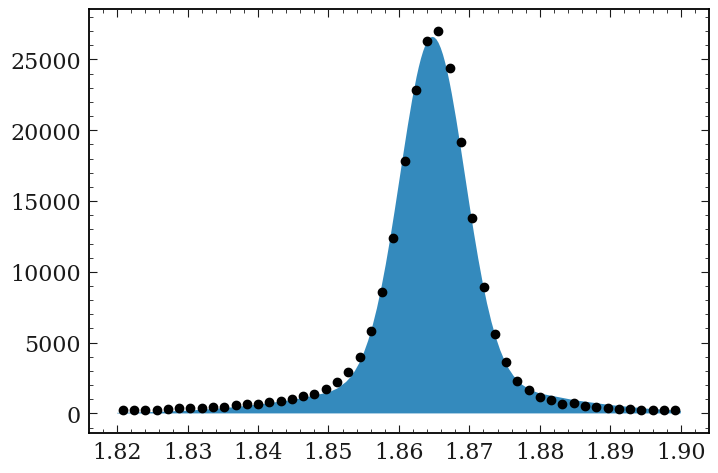

In [33]:
COST.visualize(m.values)

In [34]:
m.interactive()

true entries = 228037


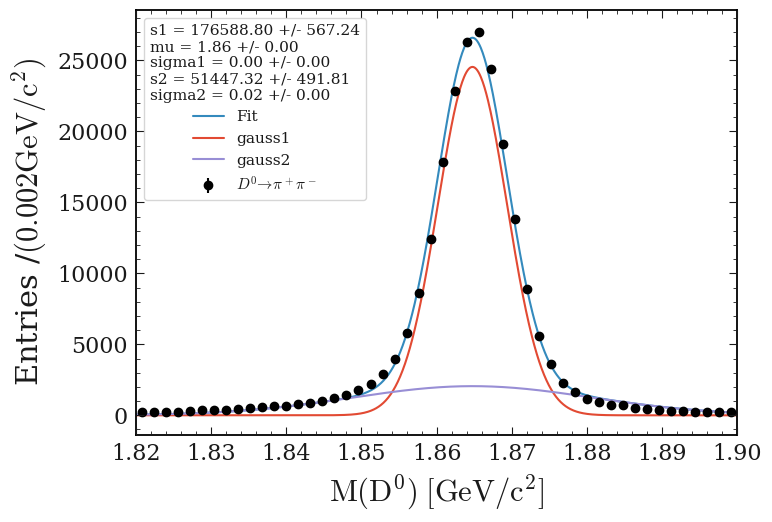

In [36]:
n, xe = np.histogram(dataset, bins=50, range=(1.82,1.9))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.82,1.9,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \pi^+ \pi^-$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")


plt.plot(xm, two_gauss(xm, *m.values)[1] * dx[0] ,label="Fit")
plt.plot(xm, one_gauss(xm, *m.values[0:3])[1] * dx[0] ,label="gauss1")
plt.plot(xm, one_gauss(xm, m.values['s2'],m.values['mu'],m.values['sigma2'], )[1] * dx[0] ,label="gauss2")



#plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
#plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")
#plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.82,1.9)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

## Generic MC

# D0 -> K- pi+

## Signal MC

In [26]:
file_name_ref_antiKstar = '/media/jykim/ssd_T5/storage/ref_study/ntuples/D2kmpip_signal_10M.root'

In [31]:
base_filter = 'D0_M>1.665 && D0_M<2.065 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && ref_antiKstar_rank_Dstp==1'

base_filter2 = 'D0_M>1.665 && D0_M<2.065 '


# base_filter = 'D0_M>1.665 && D0_M<2.065 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && Pis_charge==1'

In [32]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p',"Dstarp_isSignal"]

In [36]:
pd_ref_antiKstar = get_data(file=file_name_ref_antiKstar, tree='ref_antiKstar', base_filter=base_filter,variables=signal_variables )
pd_ref_antiKstar2 = get_data(file=file_name_ref_antiKstar, tree='ref_antiKstar', base_filter=base_filter2,variables=signal_variables )


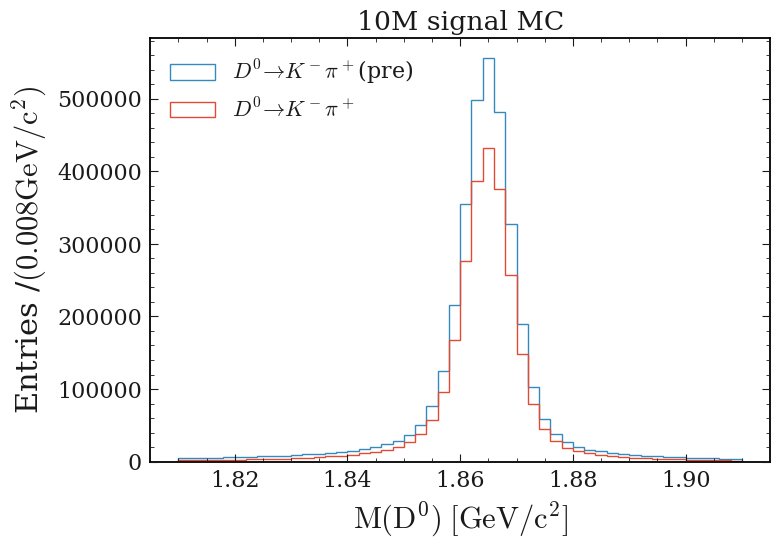

In [40]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xrange = (1.81,1.91,51)

xm = np.linspace(*xrange)


# df = pd_ref_omega.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009")




df2 = pd_ref_antiKstar2
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+$(pre)');

df = pd_ref_antiKstar
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+$');


# plt.hist(df[df["Dstarp_isSignal"]!=1]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+$(false)');


plt.legend(loc="upper left")
ax.set_title(r'10M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


In [42]:
def one_gauss(x, s, mu, sigma):
    func =  s * norm.pdf(x, mu, sigma)
#     return func
    
    return s, func


In [43]:
def two_gauss(x, s1, mu, sigma1 , s2, sigma2):
    func =  s1 * norm.pdf(x, mu, sigma1) + s2 * norm.pdf(x, mu, sigma2)
#     return func
    
    return s1+s2, func

In [44]:
dataset = pd_ref_antiKstar[(pd_ref_antiKstar['D0_M']>1.82) & (pd_ref_antiKstar['D0_M']<1.9)]['D0_M']

In [45]:
PDF = two_gauss
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=60000,s2=20000, mu=1.86, sigma1=0.05,  sigma2=0.05)

In [46]:
m.limits["s1","s2"]=(0,None)

m.limits["sigma1","sigma2"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.257e+07                 │              Nfcn = 378              │
│ EDM = 0.000402 (Goal: 0.0002)    │           time = 21.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1     │ 2.06328e6 │ 0.00032e6 │            │            │    0    │         │       │
│ 1 │ mu     │ 1.8646854 │ 0.0000033 │            │            │   1.8   │   1.9   │       │
│ 2 │ sigma1 │ 4.1350e-3 │ 0.0028e-3 │            │            │    0    │   0.1   │       │
│ 3 │ s2     │ 602.59e3  │  0.25e3   │            │            │    0    │         │       │
│ 4 │ sigma2 │ 15.634e-3 │ 0.016e-3  │            │            │    0    │   0.1   │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────┐
│        │        s1        mu    sigma1        s2    sigma2 │
├────────┼───────────────────────────────────────────────────┤
│     s1 │     1e+05  1.66e-06 -2.68e-05  5.42e+04  -0.00015 │
│     mu │  1.66e-06  1.07e-11 -4.23e-13   1.8e-06  1.73e-12 │
│ sigma1 │ -2.68e-05 -4.23e-13  8.08e-12 -4.94e-05  4.75e-12 │
│     s2 │  5.42e+04   1.8e-06 -4.94e-05  6.09e+04 -0.000277 │
│ sigma2 │  -0.00015  1.73e-12  4.75e-12 -0.000277  2.46e-10 │
└────────┴───────────────────────────────────────────────────┘

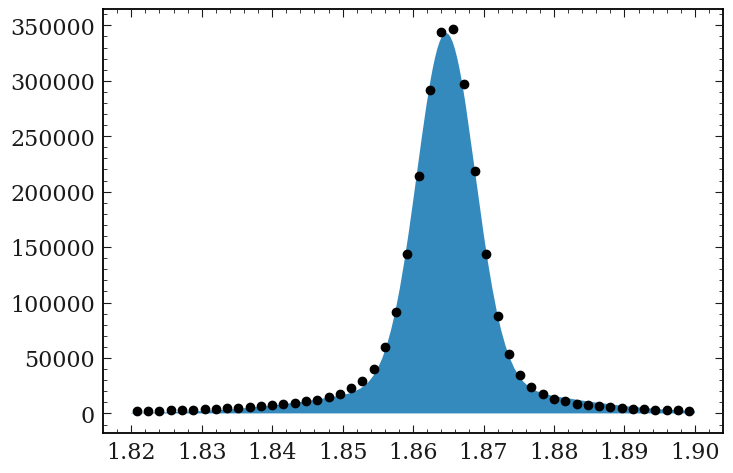

In [47]:
COST.visualize(m.values)

In [48]:
m.interactive()

true entries = 2665861


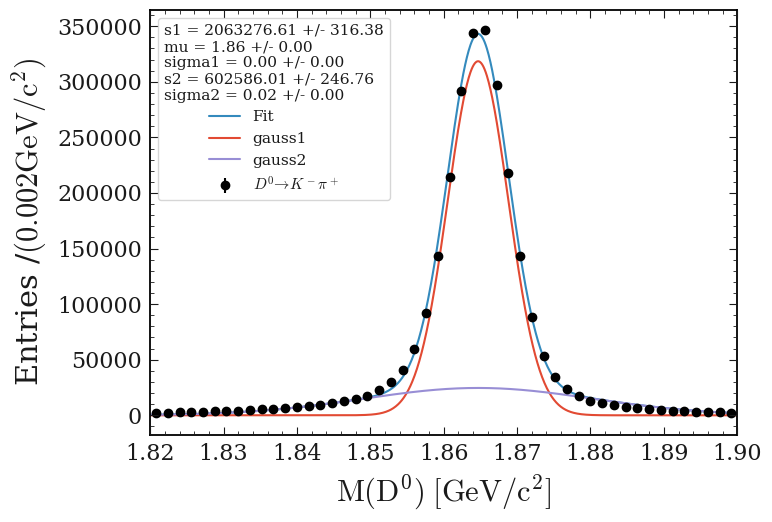

In [49]:
n, xe = np.histogram(dataset, bins=50, range=(1.82,1.9))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.82,1.9,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to K^- \pi^+$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")


plt.plot(xm, two_gauss(xm, *m.values)[1] * dx[0] ,label="Fit")
plt.plot(xm, one_gauss(xm, *m.values[0:3])[1] * dx[0] ,label="gauss1")
plt.plot(xm, one_gauss(xm, m.values['s2'],m.values['mu'],m.values['sigma2'], )[1] * dx[0] ,label="gauss2")


#plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
#plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")
#plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.82,1.9)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

## Generic MC

# D0 -> pi+ pi- pi0

## Signal MC

In [42]:
file_name_ref_omega = '/media/jykim/ssd_T5/storage/ref_study/ntuples/D2pippimpi0_signal_half_1M.root'

In [44]:
base_filter = 'D0_M>1.665 && D0_M<2.065 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.7 && ref_omega_rank_Dstp==1'
base_filter2 = 'D0_M>1.665 && D0_M<2.065 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.7'

In [45]:
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal']

In [46]:
pd_ref_omega = get_data(file=file_name_ref_omega, tree='ref_omega', base_filter=base_filter,variables=signal_variables )
pd_ref_omega2 = get_data(file=file_name_ref_omega, tree='ref_omega', base_filter=base_filter2,variables=signal_variables )


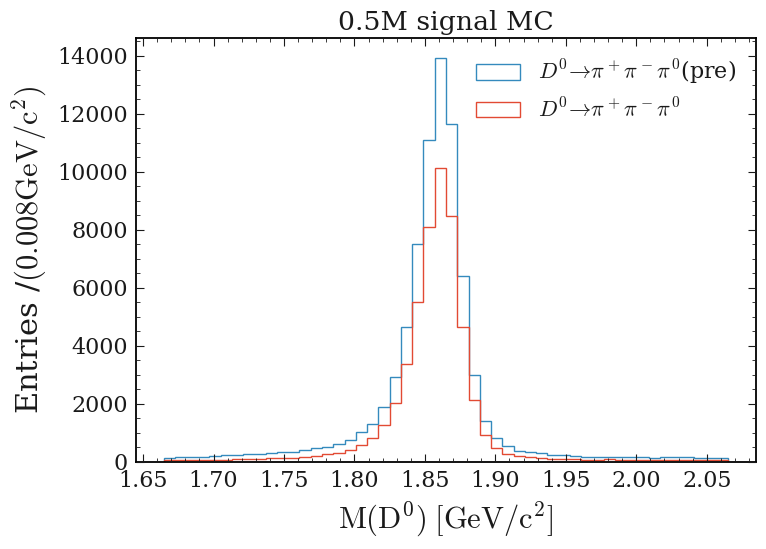

In [47]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
# xrange = (1.81,1.91,51)
xm = np.linspace(*xrange)


df2 = pd_ref_omega2
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \pi^+ \pi^- \pi^0$(pre)');

df = pd_ref_omega
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \pi^+ \pi^- \pi^0$');



# plt.hist(df[df["Dstarp_isSignal"]!=1]["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \pi^+ \pi^- \pi^0$(false)');

plt.legend(loc="upper right")
ax.set_title(r'0.5M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


In [55]:
def one_gauss(x, s, mu, sigma):
    func =  s * norm.pdf(x, mu, sigma)
#     return func
    
    return s, func


In [56]:
def two_gauss(x, s1, mu, sigma1 , s2, sigma2):
    func =  s1 * norm.pdf(x, mu, sigma1) + s2 * norm.pdf(x, mu, sigma2)
#     return func
    
    return s1+s2, func

In [57]:
dataset = pd_ref_omega[(pd_ref_omega['D0_M']>1.73) & (pd_ref_omega['D0_M']<1.93)]['D0_M']

In [59]:
PDF = two_gauss
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=60000,s2=20000, mu=1.86, sigma1=0.05,  sigma2=0.05)

In [61]:
m.limits["s1","s2"]=(0,None)

m.limits["sigma1","sigma2"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.244e+06                 │              Nfcn = 197              │
│ EDM = 8.66e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1     │  39.36e3  │  0.31e3   │            │            │    0    │         │       │
│ 1 │ mu     │  1.85824  │  0.00008  │            │            │   1.8   │   1.9   │       │
│ 2 │ sigma1 │ 14.29e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 3 │ s2     │  11.43e3  │  0.27e3   │            │            │    0    │         │       │
│ 4 │ sigma2 │  44.5e-3  │  0.5e-3   │            │            │    0    │   0.1   │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────┐
│        │        s1        mu    sigma1        s2    sigma2 │
├────────┼───────────────────────────────────────────────────┤
│     s1 │  9.85e+04  -0.00257     0.018 -5.88e+04    0.0819 │
│     mu │  -0.00257  6.93e-09 -1.71e-09   0.00256 -3.96e-10 │
│ sigma1 │     0.018 -1.71e-09     1e-08   -0.0179  2.25e-08 │
│     s2 │ -5.88e+04   0.00256   -0.0179     7e+04   -0.0816 │
│ sigma2 │    0.0819 -3.96e-10  2.25e-08   -0.0816  2.04e-07 │
└────────┴───────────────────────────────────────────────────┘

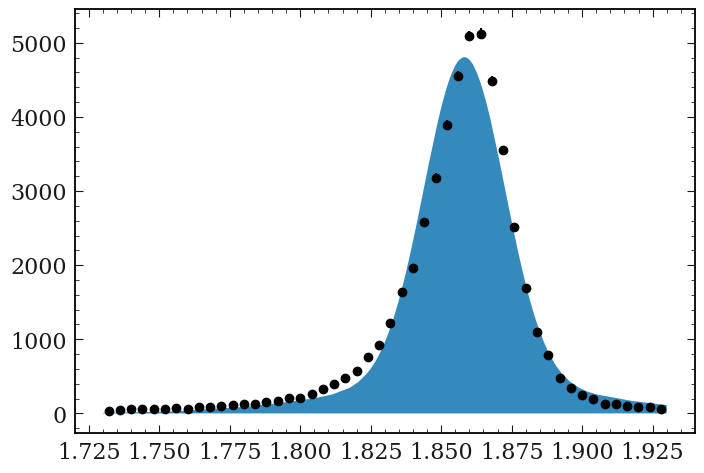

In [62]:
COST.visualize(m.values)

In [63]:
m.interactive()

true entries = 50797


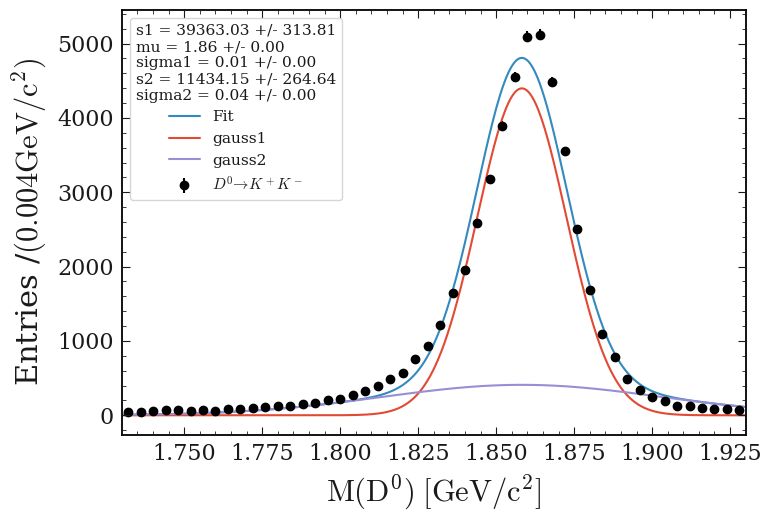

In [64]:
n, xe = np.histogram(dataset, bins=50, range=(1.73,1.93))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.73,1.93,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to K^+ K^-$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")


plt.plot(xm, two_gauss(xm, *m.values)[1] * dx[0] ,label="Fit")
plt.plot(xm, one_gauss(xm, *m.values[0:3])[1] * dx[0] ,label="gauss1")
plt.plot(xm, one_gauss(xm, m.values['s2'],m.values['mu'],m.values['sigma2'], )[1] * dx[0] ,label="gauss2")


#plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
#plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")
#plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.73,1.93)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [65]:
def same_mu_extended_gauss_crystalball(x, s1, alpha, n, CB_sigma, s2, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
  
    return s1+s2, func

In [66]:
dataset = pd_ref_omega[(pd_ref_omega['D0_M']>1.73) & (pd_ref_omega['D0_M']<1.93)]['D0_M']

In [67]:
PDF = same_mu_extended_gauss_crystalball
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=30000,s2=10000, alpha=1, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05)

In [68]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.246e+06                 │              Nfcn = 412              │
│ EDM = 0.000225 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  39.2e3   │   0.6e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.725   │   0.026   │            │            │    0    │         │       │
│ 2 │ n        │    6.8    │    0.4    │            │            │    0    │         │       │
│ 3 │ CB_sigma │ 11.10e-3  │  0.21e-3  │            │            │    0    │   0.1   │       │
│ 4 │ s2       │  11.6e3   │   0.6e3   │            │            │    0    │         │       │
│ 5 │ mu       │  1.86180  │  0.00016  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  25.7e-3  │  0.5e-3   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1     alpha         n  CB_sigma        s2        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.02e+05      9.84     -31.7     0.102 -3.64e+05    -0.044      0.28 │
│    alpha │      9.84    0.0007  -0.00821  4.86e-06     -9.86  -3.7e-06  1.01e-05 │
│        n │     -31.7  -0.00821      0.17 -3.33e-05      31.8  3.97e-05 -6.54e-05 │
│ CB_sigma │     0.102  4.86e-06 -3.33e-05  4.62e-08    -0.103 -2.71e-08  8.71e-08 │
│       s2 │ -3.64e+05     -9.86      31.8    -0.103  3.76e+05    0.0441    -0.281 │
│       mu │    -0.044  -3.7e-06  3.97e-05 -2.71e-08    0.0441  2.69e-08 -4.97e-08 │
│    sigma │      0.28  1.01e-05 -6.54e-05  8.71e-08    -0.281 -4.97e-08  2.92e-07 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

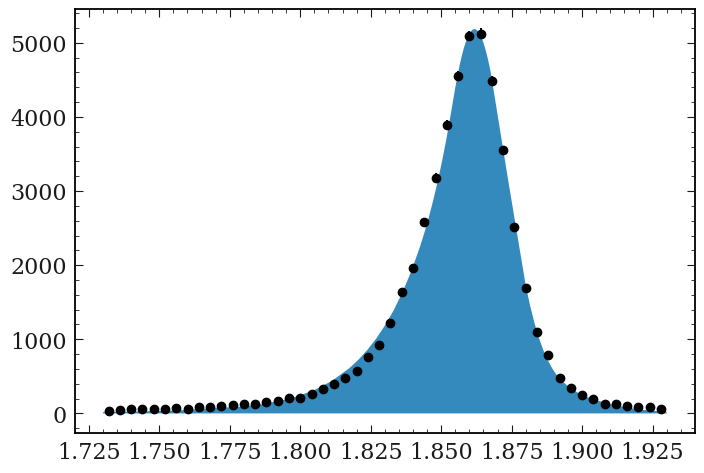

In [69]:
COST.visualize(m.values)

true entries = 50797


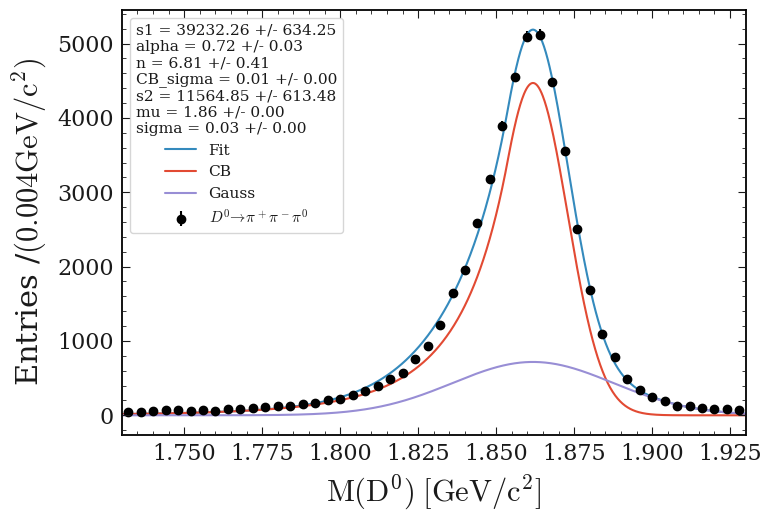

In [70]:
n, xe = np.histogram(dataset, bins=50, range=(1.73,1.93))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.73,1.93,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \pi^+ \pi^- \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
# alpha, n, mu, CB_sigma
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")

plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
# ax.set_xlim(1.665,2.065)
ax.set_xlim(1.73,1.93)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

## Generic MC